### Import Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

### Read the datasets

In [3]:
train = pd.read_csv("../Data/df_train_fashion.csv")
test = pd.read_csv("../Data/df_valid_fashion.csv")

### Train Dataset

In [4]:
# Get Number of records and columns
print(train.shape)
train.head(2)

(129063, 19)


,Label,Size,Overall_fit,Rented_for,Size_usually_worn,Height,Age,Bust_size,Body_type,Weight,Rating,Date,Rent_price,Product_details,Number_of_reviews,Sleeves,Neckline,Dress_Style,BMI
0,TOP CONTRIBUTOR,unknown,unknown,Date,4,66,35,36B,hourglass,135,1,fall,45,"hourglass. long sleeves. long sleeves. 36"" fro...",12,long_sleeves,other,hourglass,21.787190
1,TOP CONTRIBUTOR,unknown,Overall fit: Large,Work,12,64,49,36B,pear,150,1,spring,85,hourglass. three sleeves. v-neckline. hidden b...,40,three_quarter_sleeves,v_neckline,hourglass,25.744629


### Label Encoding of Categorical Variables

In [4]:
# For Train set
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [5]:
# For Test Set
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

### Building Models

In [6]:
features = ['Label', 'Size', 'Overall_fit', 'Rented_for', 'Size_usually_worn',
            'Height', 'Age', 'Bust_size', 'Body_type', 'Weight',  'Date',
            'Rent_price', 'Number_of_reviews', 'Sleeves', 'Neckline', 'Dress_Style','BMI']
target = ['Rating']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [10]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy_train = accuracy_score(y_train, model.predict(X_train))
    accuracy_test = accuracy_score(y_test, y_pred)
    roc_auc_train = roc_auc_score(y_train, model.predict(X_train)) 
    roc_auc_test = roc_auc_score(y_test, y_pred)
    
    time_taken = time.time()-t0
    print("Train_Accuracy = {}".format(accuracy_train))
    print("Test_Accuracy = {}".format(accuracy_test))
    print("ROC Area under Curve for training = {}".format(roc_auc_train))
    print("ROC Area under Curve for testing = {}".format(roc_auc_test))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy_test, roc_auc_test, time_taken

#### Logistic Regression

In [ ]:

    
params_lr = {'penalty': 'elasticnet', 
             'l1_ratio':0.5, 
             'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)

Train_Accuracy = 0.8381255665837615
Test_Accuracy = 0.8387466683195933
ROC Area under Curve for training = 0.5342434895646305
ROC Area under Curve for testing = 0.5382135662145439
Time taken = 100.79763197898865
              precision    recall  f1-score   support

           0    0.84440   0.98873   0.91089     26895
           1    0.60853   0.08769   0.15330      5371

    accuracy                        0.83875     32266
   macro avg    0.72647   0.53821   0.53209     32266
weighted avg    0.80514   0.83875   0.78478     32266



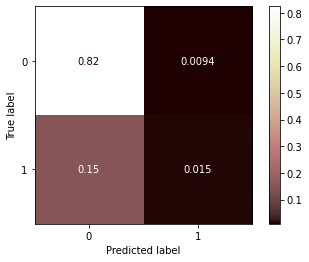

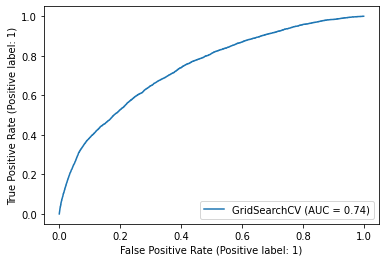

In [21]:
# Logistic Regression penalized with Elastic Net 
param_grid = {'penalty' : ["l2","l1",'elasticnet'],
            "C" : np.logspace(0,100,1000)}
LogReg = LogisticRegression()
model_lr = GridSearchCV(LogReg,param_grid)

model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

#### K-Nearest Neighbor Classifier

Train_Accuracy = 0.8437429782354354
Test_Accuracy = 0.8382817826814604
ROC Area under Curve for training = 0.5439485521957209
ROC Area under Curve for testing = 0.531676559673768
Time taken = 36027.78322815895
              precision    recall  f1-score   support

           0    0.84250   0.99130   0.91086     26895
           1    0.62319   0.07205   0.12917      5371

    accuracy                        0.83828     32266
   macro avg    0.73285   0.53168   0.52002     32266
weighted avg    0.80600   0.83828   0.78074     32266



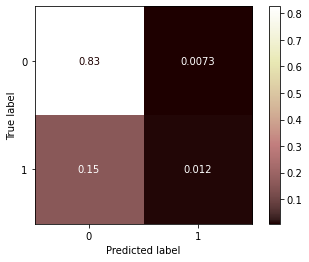

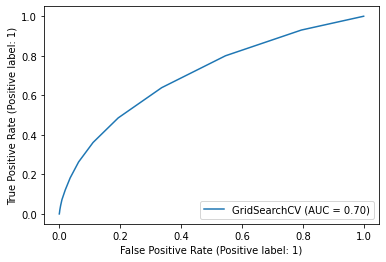

In [25]:
params_kn = {'n_neighbors':[2,4,6,8,10,12,14,16],
             'algorithm': ['kd_tree'],
             'n_jobs':[4],
              "p" : [2,3]}

knn = KNeighborsClassifier()
model_kn = GridSearchCV(knn, params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

### Decision Tree Classifier

In [ ]:
params_dt = {'max_depth': [5,8,12,15,25,30,None],    
             'max_features': ["auto","sqrt","log2"],
            "splitter":["best","random"]}
dtc = DecisionTreeClassifier()
model_dt = GridSearchCV(dtc, params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

### Neural Network

In [ ]:
# Neural Network (Multilayer Perceptron)
params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'relu',
             'solver': 'lbfgs',
             'max_iter': 100}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

### Random Forest

In [ ]:
params_rf = {'max_depth': [5,8,15,25,30,None],
             'min_samples_leaf': [1,2,5,10],
             'min_samples_split': [1,2,5,10,15,100],
             'n_estimators': [100,120,300,500,800,1200],
             "max_features" : ["sqrt","log2",None]}

rf = RandomForestClassifier()
model_rf = GridSearchCV(rf, params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

### XGBoost

In [ ]:

params_xgb = {
    'n_estimators' : [100, 200, 250],
    'max_depth' : list(range(3, 25)),
    "gamma":[0.05,0.06,0.07,0.08,0.09,0.1,0.3,0.5,0.7,0.9,1.0]
    'learning_rate' : [0.01, 0.005, 0.1, 0.3],
    "min_child_weight":[1,3,5,7]
    'colsample_bytree' : [0.5, 0.75, 0.85,1],
    'subsample' : [0.6, 0.8, 1] 
}

xgb = xgb.XGBClassifier()
model_xgb = GridSearchCV(xgb, params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

### Model Comparison

Compare the performances of the above discussed models with respect to their ROC_AUC score and total time taken for execution.

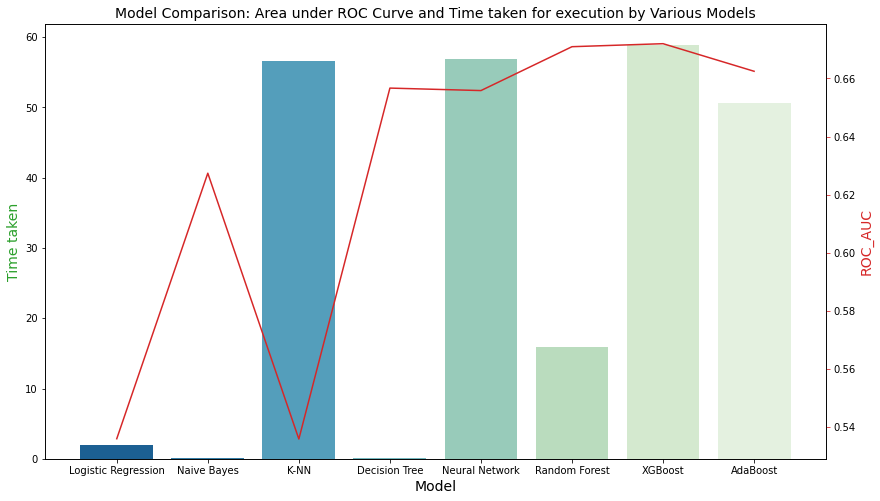

In [30]:
roc_auc_scores = [roc_auc_lr, roc_auc_kn, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_xgb]
tt = [tt_lr,  tt_kn, tt_dt, tt_nn, tt_rf, tt_xgb]

model_data = {'Model': ['Logistic Regression','K-NN','Decision Tree','Neural Network','Random Forest','XGBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=14)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Time taken', fontsize=14, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='GnBu_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

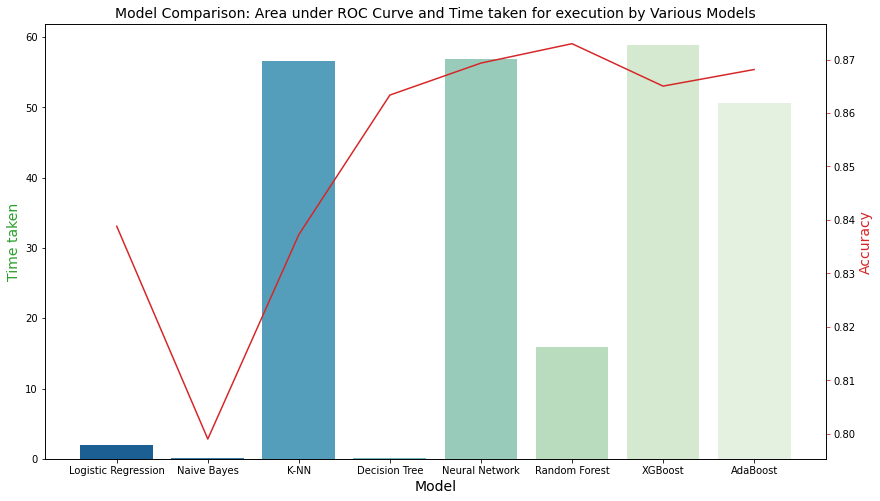

In [33]:
accuracy = [accuracy_lr, accuracy_nb, accuracy_kn, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_xgb, accuracy_adab]
tt = [tt_lr, tt_nb, tt_kn, tt_dt, tt_nn, tt_rf, tt_xgb, tt_adab]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree','Neural Network','Random Forest','XGBoost','AdaBoost'],
              'Accuracy': accuracy,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=14)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Time taken', fontsize=14, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='GnBu_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)